In [1]:
import pandas as pd
import os
os.chdir("C:/Users/Ankita Bagaria/Desktop/Spotle/Predict Airline Volumes With Data Science and Time Series")

In [2]:
df = pd.read_csv('Passengers-Airlines-Date_new.csv', sep = ',')

In [3]:
df1 = pd.read_csv('Passengers-Airlines-Date_new.csv', sep = ',')

In [4]:
df.head()

,Month,Passenger (in 1000)
0,2003-01,9726
1,2003-02,8283
2,2003-03,9539
3,2003-04,8309
4,2003-05,8802


In [5]:
df.columns=["Month","Passenger(in 1000)"]

In [6]:
df1.columns=["Month","Passenger(in 1000)"]

In [7]:
df.head()
df.shape

(168, 2)

In [8]:
df.tail()

,Month,Passenger(in 1000)
163,2016-08,20654
164,2016-09,17162
165,2016-10,16905
166,2016-11,15653
167,2016-12,18014


In [9]:
df.isnull()

,Month,Passenger(in 1000)
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
163,False,False
164,False,False
165,False,False
166,False,False


In [10]:
df["Month"].dtype

dtype('O')

In [11]:
df['Month']=pd.to_datetime(df['Month'])

In [12]:
df1['Month']=pd.to_datetime(df1['Month'])

In [13]:
df.head()

,Month,Passenger(in 1000)
0,2003-01-01,9726
1,2003-02-01,8283
2,2003-03-01,9539
3,2003-04-01,8309
4,2003-05-01,8802


In [14]:
df.set_index('Month',inplace=True)

In [15]:
df1.set_index('Month',inplace=True)

In [16]:
df.head()

,Passenger(in 1000)
Month,
2003-01-01,9726
2003-02-01,8283
2003-03-01,9539
2003-04-01,8309
2003-05-01,8802


In [17]:
df.describe()

,Passenger(in 1000)
count,168.000000
mean,13589.089286
std,2540.746615
min,8283.000000
25%,11805.250000
50%,13234.000000
75%,15234.000000
max,21435.000000


## Step2: Visualize the data

In [18]:
import matplotlib.pyplot

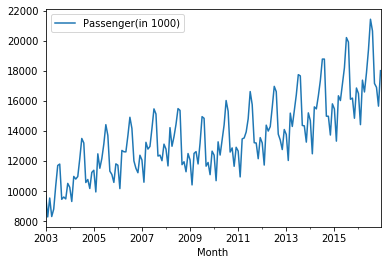

In [19]:
df.plot()

### There seems to be some seasonality in the data 
### It needs to be checked if the data is stationary or not 

In [20]:
#Testing for stationarity of data 

In [21]:
from statsmodels.tsa.stattools import adfuller

C:\Users\Ankita Bagaria\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
test_resuts = adfuller(df['Passenger(in 1000)'])

In [23]:
#Ho = It is not stationary 
#H1 = It is stationary 

In [24]:
def adfuller_test(passenger):
    result=adfuller(passenger)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [25]:
adfuller_test(df['Passenger(in 1000)'])

ADF Test Statistic : -0.0019515076458805655
p-value : 0.9583703998835896
#Lags Used : 13
Number of Observations Used : 154
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


#### It is confirmed that the data is non-stationary and null hypothesis testing is not rejected 

### Differencing 

##### Differencing is used to remove trend and seasonality in the data 

In [26]:
df['Passenger First Difference'] = df['Passenger(in 1000)'] - df['Passenger(in 1000)'].shift(1)

In [27]:
df['Seasonal First Difference'] = df['Passenger(in 1000)'] - df['Passenger(in 1000)'].shift(12)

In [28]:
#df['Seasonal First Difference'] = df['Passenger First Difference'] - df['Passenger First Difference'].shift(12)

In [29]:
df.head(14)

,Passenger(in 1000),Passenger First Difference,Seasonal First Difference
Month,,,
2003-01-01,9726,NaN,NaN
2003-02-01,8283,-1443.0,NaN
2003-03-01,9539,1256.0,NaN
2003-04-01,8309,-1230.0,NaN
2003-05-01,8802,493.0,NaN
2003-06-01,10348,1546.0,NaN
2003-07-01,11705,1357.0,NaN
2003-08-01,11800,95.0,NaN
2003-09-01,9455,-2345.0,NaN


In [30]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.949061500317316
p-value : 0.03993306630818856
#Lags Used : 11
Number of Observations Used : 144
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


#### Here p<0.05, hence null hypothesis is rejected and the data is stationary now

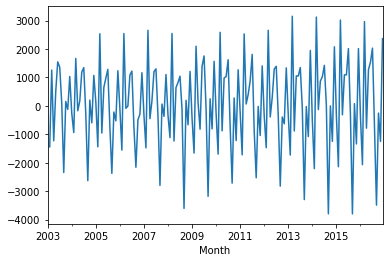

In [31]:
df['Passenger First Difference'].plot()

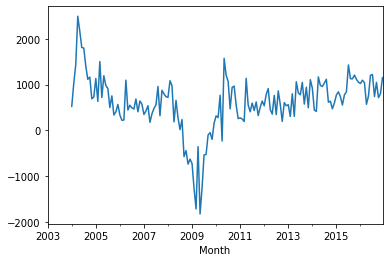

In [32]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model

In [33]:
import matplotlib.pyplot as plt

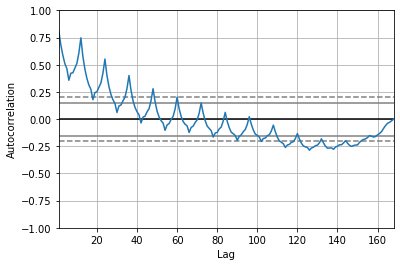

In [34]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Passenger(in 1000)'])
plt.show()

#### In the beginning of the year the correlation is high and then drops due to seasonality effect

In [35]:
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

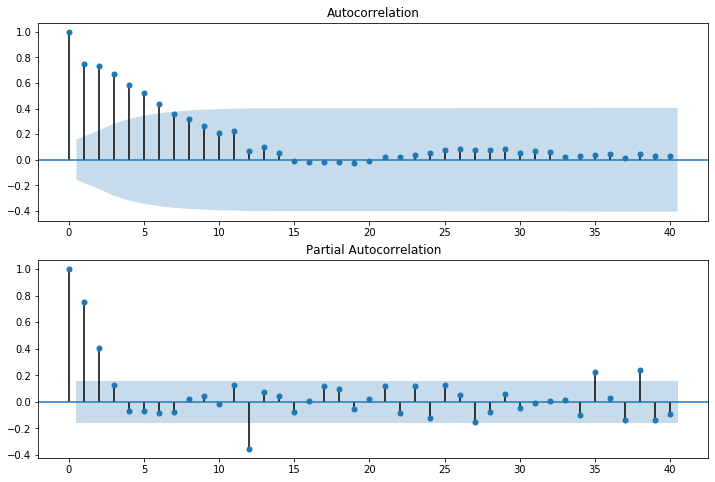

In [36]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

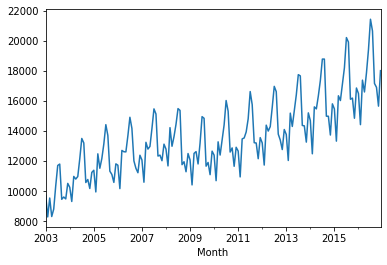

In [37]:
df["Passenger(in 1000)"].plot()

In [38]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
#from statsmodels.tsa.arima_model import ARIMA

In [39]:
#d = 2, q = 40, p = 2
from statsmodels.tsa.arima_model import ARIMA

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
model=ARIMA(df['Passenger(in 1000)'],order=(6,1,2))

In [42]:
model_fit=model.fit()

In [43]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                               
================================================================================
Dep. Variable:     D.Passenger(in 1000)   No. Observations:                  167
Model:                   ARIMA(6, 1, 2)   Log Likelihood               -1397.135
Method:                         css-mle   S.D. of innovations           1024.791
Date:                  Tue, 26 Jan 2021   AIC                           2814.270
Time:                          12:38:47   BIC                           2845.450
Sample:                      02-01-2003   HQIC                          2826.925
                           - 12-01-2016                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         48.4045     10.304      4.698      0.000      28.210      68.599
ar.L1.D.Passenger(in 1000)    -0.0591      0.072     -0.819      0.414      -0.200       0.082
ar.L2.D.Passenger(in 1000)     0.0964      0.070      1.375      0.171      -0.041       0.234
ar.L3.D.Passenger(in 1000)    -0.1027      0.065     -1.589      0.114      -0.229       0.024
ar.L4.D.Passenger(in 1000)    -0.1855      0.064     -2.903      0.004      -0.311      -0.060
ar.L5.D.Passenger(in 1000)     0.0598      0.068      0.883      0.378      -0.073       0.193
ar.L6.D.Passenger(in 1000)    -0.5506      0.068     -8.131      0.000      -0.683      -0.418
ma.L1.D.Passenger(in 1000)    -0.1277      0.059     -2.180      0.031      -0.243      -0.013
ma.L2.D.Passenger(in 1000)    -0.6602      0.054    -12.256      0.000      -0.766      -0.555
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9064           -0.5210j            1.0455           -0.4170
AR.2           -0.9064           +0.5210j            1.0455            0.4170
AR.3            0.9223           -0.5865j            1.0930           -0.0901
AR.4            0.9223           +0.5865j            1.0930            0.0901
AR.5            0.0385           -1.1787j            1.1793           -0.2448
AR.6            0.0385           +1.1787j            1.1793            0.2448
MA.1            1.1378           +0.0000j            1.1378            0.0000
MA.2           -1.3312           +0.0000j            1.3312            0.5000
-----------------------------------------------------------------------------
"""

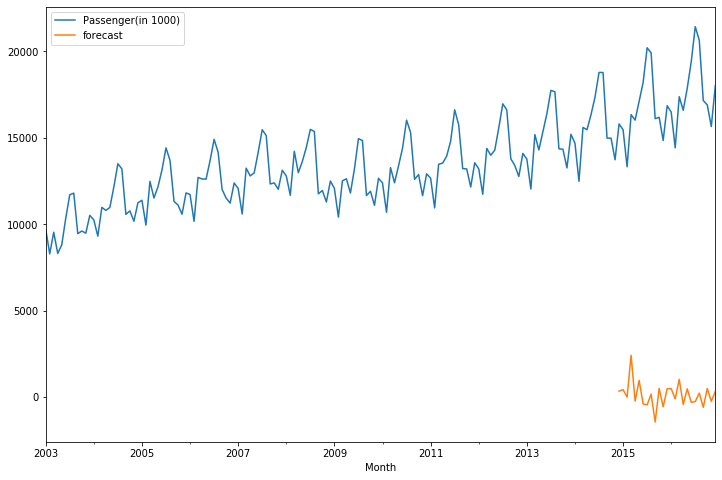

In [44]:
df['forecast']=model_fit.predict(start=143,end=167,dynamic=True)
df[['Passenger(in 1000)','forecast']].plot(figsize=(12,8))

In [45]:
import statsmodels.api as sm

In [46]:
import itertools

In [47]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [48]:
#for param in pdq:
    #for param_seasonal in seasonal_pdq:
        #try:
            #mod = sm.tsa.statespace.SARIMAX(df['Passenger(in 1000)'],
                                            #order=param,
                                            #seasonal_order=param_seasonal,
                                            #enforce_stationarity=False,
                                            #enforce_invertibility=False)
            #results = mod.fit()
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        #except:
            #continue

In [49]:
model=sm.tsa.statespace.SARIMAX(df['Passenger(in 1000)'],order=(6,1,2),seasonal_order=(1,1,1,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                 Passenger(in 1000)   No. Observations:                  168
Model:             SARIMAX(6, 1, 2)x(1, 1, 1, 12)   Log Likelihood               -1122.985
Date:                            Tue, 26 Jan 2021   AIC                           2267.970
Time:                                    12:39:14   BIC                           2301.448
Sample:                                01-01-2003   HQIC                          2281.568
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9630      0.100      9.628      0.000       0.767       1.159
ar.L2         -0.4611      0.114     -4.041      0.000      -0.685      -0.237
ar.L3         -0.2298      0.127     -1.806      0.071      -0.479       0.020
ar.L4         -0.0923      0.105     -0.881      0.378      -0.298       0.113
ar.L5         -0.0124      0.135     -0.091      0.927      -0.278       0.253
ar.L6         -0.1341      0.101     -1.327      0.184      -0.332       0.064
ma.L1         -1.4776      0.067    -22.164      0.000      -1.608      -1.347
ma.L2          0.9863      0.087     11.366      0.000       0.816       1.156
ar.S.L12      -0.1065      0.223     -0.477      0.633      -0.544       0.331
ma.S.L12      -0.3192      0.236     -1.350      0.177      -0.783       0.144
sigma2      1.219e+05   1.59e+04      7.658      0.000    9.07e+04    1.53e+05
===================================================================================
Ljung-Box (Q):                       27.99   Jarque-Bera (JB):                 4.89
Prob(Q):                              0.92   Prob(JB):                         0.09
Heteroskedasticity (H):               0.74   Skew:                             0.22
Prob(H) (two-sided):                  0.28   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9630      0.100      9.628      0.000       0.767       1.159
ar.L2         -0.4611      0.114     -4.041      0.000      -0.685      -0.237
ar.L3         -0.2298      0.127     -1.806      0.071      -0.479       0.020
ar.L4         -0.0923      0.105     -0.881      0.378      -0.298       0.113
ar.L5         -0.0124      0.135     -0.091      0.927      -0.278       0.253
ar.L6         -0.1341      0.101     -1.327      0.184      -0.332       0.064
ma.L1         -1.4776      0.067    -22.164      0.000      -1.608      -1.347
ma.L2          0.9863      0.087     11.366      0.000       0.816       1.156
ar.S.L12      -0.1065      0.223     -0.477      0.633      -0.544       0.331
ma.S.L12      -0.3192      0.236     -1.350      0.177      -0.783       0.144
sigma2      1.219e+05   1.59e+04      7.658      0.0

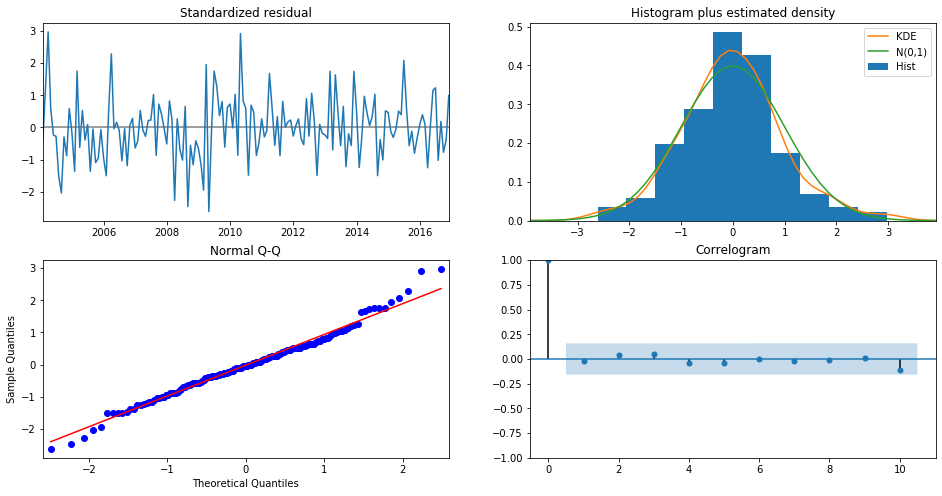

In [51]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.

In [52]:
model1=sm.tsa.statespace.SARIMAX(df['Passenger(in 1000)'],order=(1,1,1),seasonal_order=(1,1,0,12))
results1=model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                 Passenger(in 1000)   No. Observations:                  168
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood               -1128.206
Date:                            Tue, 26 Jan 2021   AIC                           2264.412
Time:                                    12:39:17   BIC                           2276.585
Sample:                                01-01-2003   HQIC                          2269.356
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0567      0.137     -0.413      0.680      -0.326       0.212
ma.L1         -0.4386      0.137     -3.195      0.001      -0.708      -0.170
ar.S.L12      -0.3227      0.070     -4.593      0.000      -0.460      -0.185
sigma2      1.256e+05   1.28e+04      9.781      0.000       1e+05    1.51e+05
===================================================================================
Ljung-Box (Q):                       32.07   Jarque-Bera (JB):                 6.62
Prob(Q):                              0.81   Prob(JB):                         0.04
Heteroskedasticity (H):               0.70   Skew:                             0.25
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
print(results1.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0567      0.137     -0.413      0.680      -0.326       0.212
ma.L1         -0.4386      0.137     -3.195      0.001      -0.708      -0.170
ar.S.L12      -0.3227      0.070     -4.593      0.000      -0.460      -0.185
sigma2      1.256e+05   1.28e+04      9.781      0.000       1e+05    1.51e+05


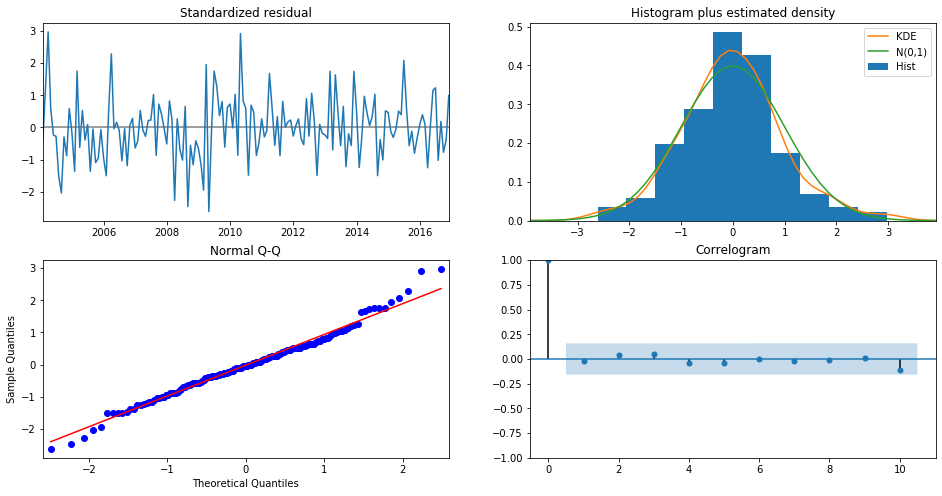

In [54]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [55]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                 Passenger(in 1000)   No. Observations:                  168
Model:             SARIMAX(6, 1, 2)x(1, 1, 1, 12)   Log Likelihood               -1122.985
Date:                            Tue, 26 Jan 2021   AIC                           2267.970
Time:                                    12:39:18   BIC                           2301.448
Sample:                                01-01-2003   HQIC                          2281.568
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9630      0.100      9.628      0.000       0.767       1.159
ar.L2         -0.4611      0.114     -4.041      0.000      -0.685      -0.237
ar.L3         -0.2298      0.127     -1.806      0.071      -0.479       0.020
ar.L4         -0.0923      0.105     -0.881      0.378      -0.298       0.113
ar.L5         -0.0124      0.135     -0.091      0.927      -0.278       0.253
ar.L6         -0.1341      0.101     -1.327      0.184      -0.332       0.064
ma.L1         -1.4776      0.067    -22.164      0.000      -1.608      -1.347
ma.L2          0.9863      0.087     11.366      0.000       0.816       1.156
ar.S.L12      -0.1065      0.223     -0.477      0.633      -0.544       0.331
ma.S.L12      -0.3192      0.236     -1.350      0.177      -0.783       0.144
sigma2      1.219e+05   1.59e+04      7.658      0.000    9.07e+04    1.53e+05
===================================================================================
Ljung-Box (Q):                       27.99   Jarque-Bera (JB):                 4.89
Prob(Q):                              0.92   Prob(JB):                         0.09
Heteroskedasticity (H):               0.74   Skew:                             0.22
Prob(H) (two-sided):                  0.28   Kurtosis:                         3.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Validating forecasts

##### To help us understand the accuracy of our forecasts, we compare passenger volume to real volume of the time series, and we set forecasts to start at 2015–01–01 to the end of the data.

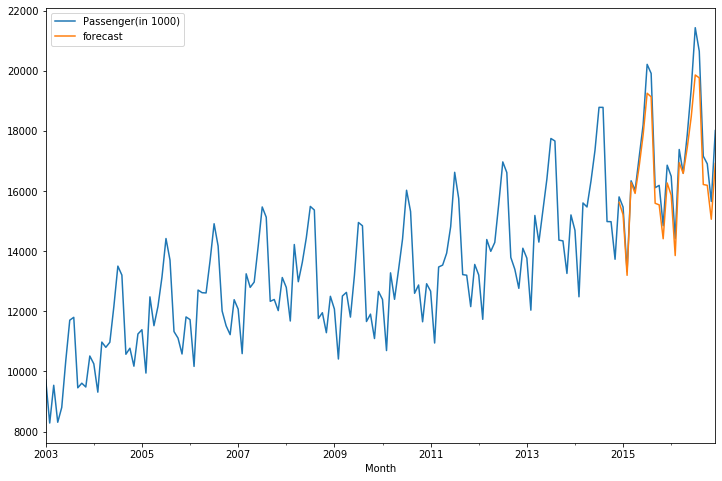

In [56]:
df['forecast']=results.predict(start=143,end=167,dynamic=True)
df[['Passenger(in 1000)','forecast']].plot(figsize=(12,8))

##### The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

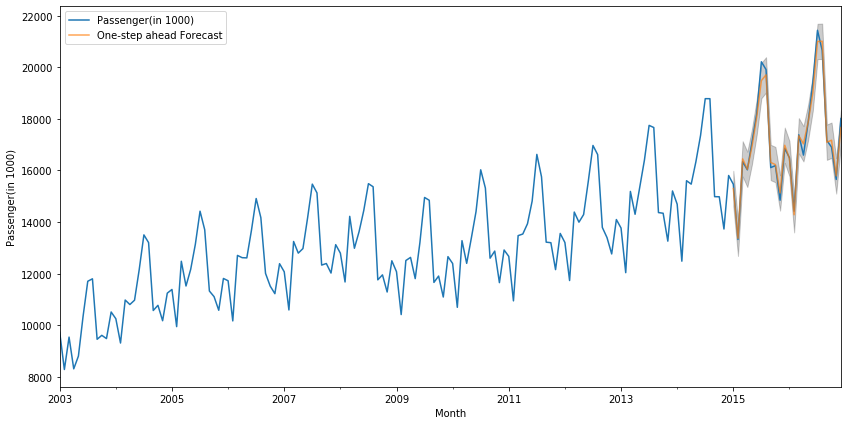

In [57]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df1['2003':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Month')
ax.set_ylabel('Passenger(in 1000)')
plt.legend()
plt.show()


In [58]:
y = df['Passenger(in 1000)'].resample('MS').mean()

In [59]:
y_forecasted = pred.predicted_mean
y_truth = y['2015-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 70957.93


In [60]:
import numpy as np

In [61]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 266.38


###### In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit. Root Mean Square Error (RMSE) tells us that our model was able to forecast the average monthly passenger volume in the test set within 266.38 of the real monthly sales. In my opinion, this is a pretty good model so far.

In [62]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [63]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [64]:
future_datest_df.tail()

,Passenger(in 1000),Passenger First Difference,Seasonal First Difference,forecast
2018-07-01,NaN,NaN,NaN,NaN
2018-08-01,NaN,NaN,NaN,NaN
2018-09-01,NaN,NaN,NaN,NaN
2018-10-01,NaN,NaN,NaN,NaN
2018-11-01,NaN,NaN,NaN,NaN


In [65]:
future_df=pd.concat([df,future_datest_df])

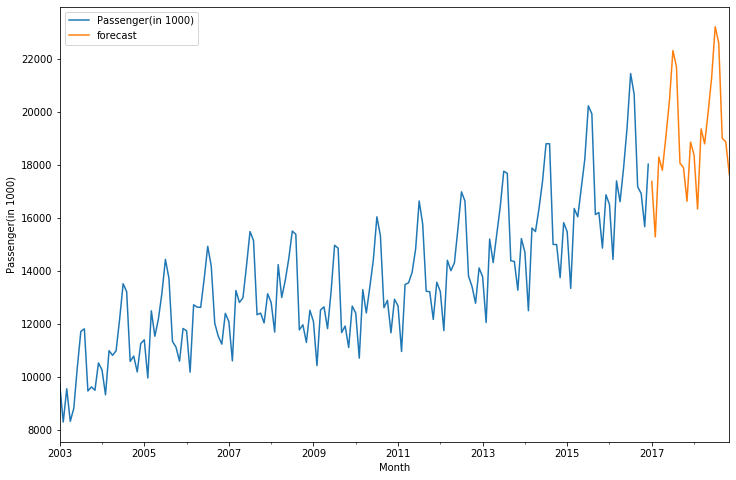

In [75]:
future_df['forecast'] = results.predict(start=168,end=191,dynamic=True)  
future_df[['Passenger(in 1000)', 'forecast']].plot(figsize=(12, 8), xlabel = 'Month', ylabel = 'Passenger(in 1000)')
#ax.set_xlabel('Month')
#ax.set_ylabel('Passenger(in 1000)')
#plt.legend()
#plt.show()

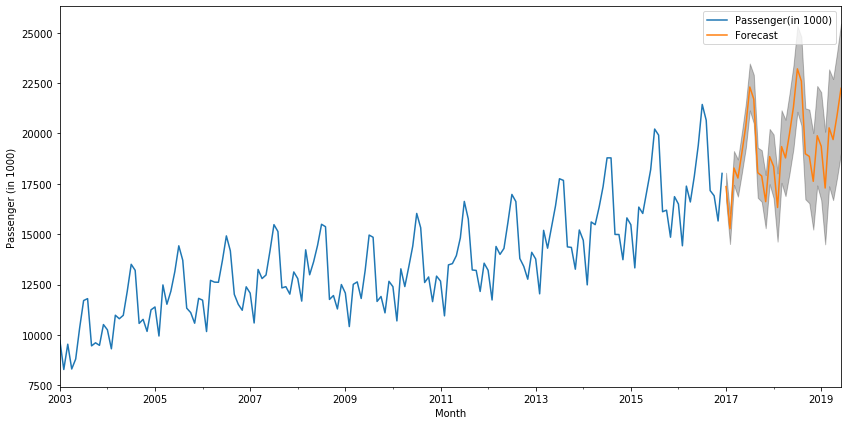

In [76]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = df1['2003':].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Month')
ax.set_ylabel('Passenger (in 1000)')
plt.legend()
plt.show()

###### Our model clearly captured passenger volume seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.